In [1]:
# import capital as cp
import scanpy as sc
import networkx as nx
import pandas as pd
import numpy as np
import anndata


In [2]:
import anndata
# adata1 = anndata.read("../../../capital/docs/tutorials/BRCA_EMTAB8107_expression_processed.h5ad")
# adata2 = anndata.read("../../../capital/docs/tutorials/BRCA_GSE114727_inDrop_expression_processed.h5ad")
# adata1 = anndata.read("../capital/docs/tutorials/BRCA_EMTAB8107_expression_processed.h5ad")


In [3]:

ann1 = pd.read_csv('./datas/merge5/ann1.csv',index_col="label")
datas = pd.read_csv("./datas/data1/data_cell.csv").set_index("Unnamed: 0")
ann1.columns = datas.columns

meta1 = pd.read_csv('./datas/merge5/meta1.csv')
adata = anndata.AnnData(ann1)
# adata = anndata.AnnData(ann1)
adata.raw = adata
# same as adata = adata[:,adata.var['highly_variable']] but inplace
sc.tl.pca(
    adata,
    n_comps=50
)
sc.pp.neighbors(adata,
                n_neighbors=10,
                n_pcs=50,
                random_state=1234
                )
sc.tl.diffmap(adata,random_state=1234)
sc.tl.umap(adata,random_state=1234)
sc.tl.leiden(adata,random_state=1234)
sc.tl.paga(adata, groups='leiden')

/var/folders/bm/69jvgsdj3rxch558kx9yp9y00000gn/T/ipykernel_76555/3444810076.py:6: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(ann1)
/Users/dongjiajie/opt/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [4]:

ann1 = pd.read_csv('./datas/merge6/ann1.csv',index_col="label")
datas = pd.read_csv("./datas/data2/data_cell.csv").set_index("Unnamed: 0")
ann1.columns = datas.columns

meta1 = pd.read_csv('./datas/merge6/meta1.csv')
adata2 = anndata.AnnData(ann1)
# adata = anndata.AnnData(ann1)
adata2.raw = adata2
# same as adata = adata[:,adata.var['highly_variable']] but inplace
sc.tl.pca(
    adata2,
    n_comps=50
)
sc.pp.neighbors(adata2,
                n_neighbors=10,
                n_pcs=50,
                random_state=1234
                )
sc.tl.diffmap(adata2,random_state=1234)
sc.tl.umap(adata2,random_state=1234)
sc.tl.leiden(adata2,random_state=1234)
sc.tl.paga(adata2, groups='leiden')

/var/folders/bm/69jvgsdj3rxch558kx9yp9y00000gn/T/ipykernel_76555/3959023785.py:6: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata2 = anndata.AnnData(ann1)
/Users/dongjiajie/opt/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [5]:
import capital as cp

In [6]:
cp.tl.trajectory_tree(adata, groupby="leiden", tree=None)
cp.tl.trajectory_tree(adata2, groupby="leiden", tree=None)

13 is set as a root node
2 is set as a root node


In [7]:
adata

AnnData object with n_obs × n_vars = 10171 × 513
    obs: 'leiden'
    uns: 'pca', 'neighbors', 'diffmap_evals', 'umap', 'leiden', 'paga', 'leiden_sizes', 'cluster_centroid', 'capital'
    obsm: 'X_pca', 'X_diffmap', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

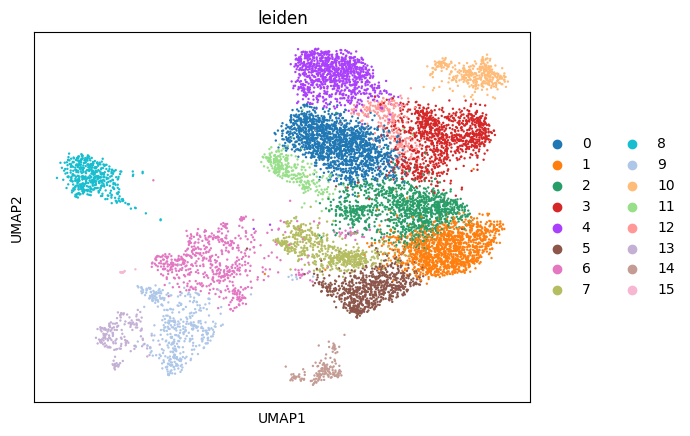

In [8]:
sc.pl.umap(adata, color="leiden")

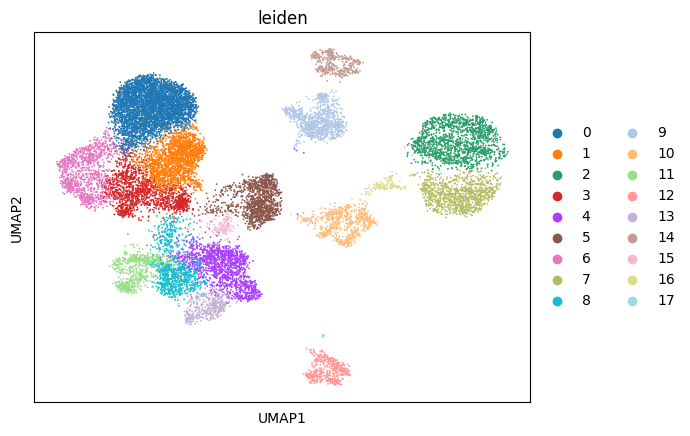

In [9]:
sc.pl.umap(adata2, color="leiden")

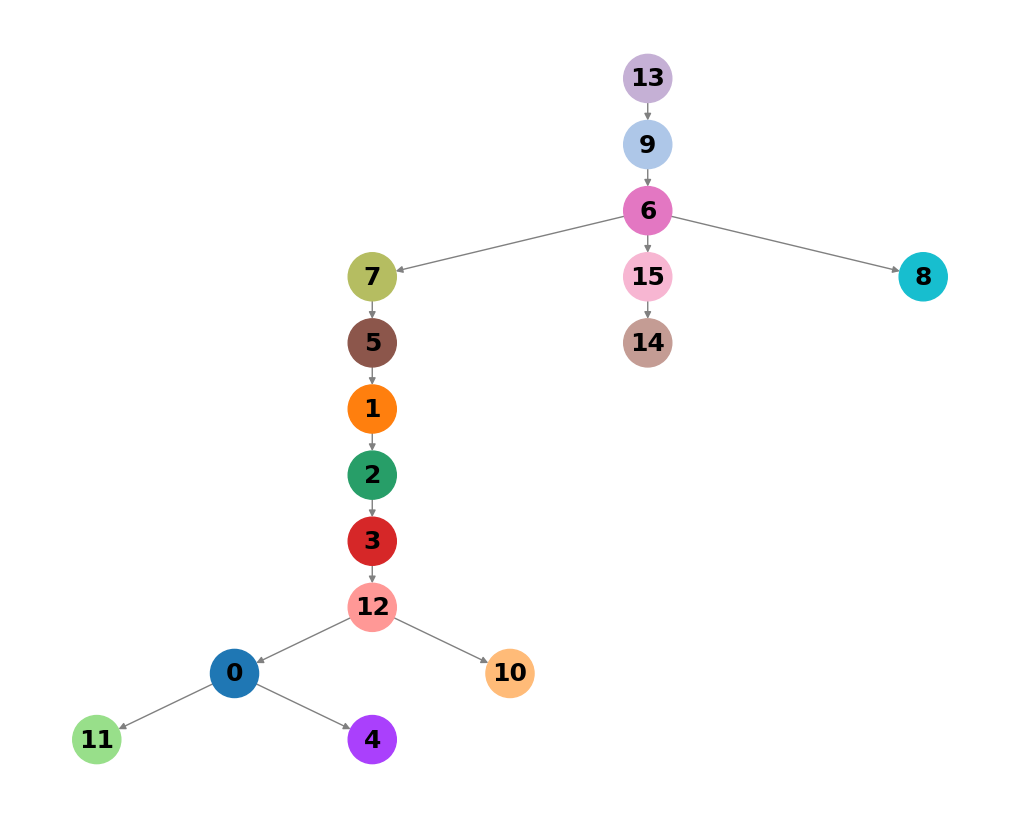

In [10]:
cp.pl.trajectory_tree(adata)

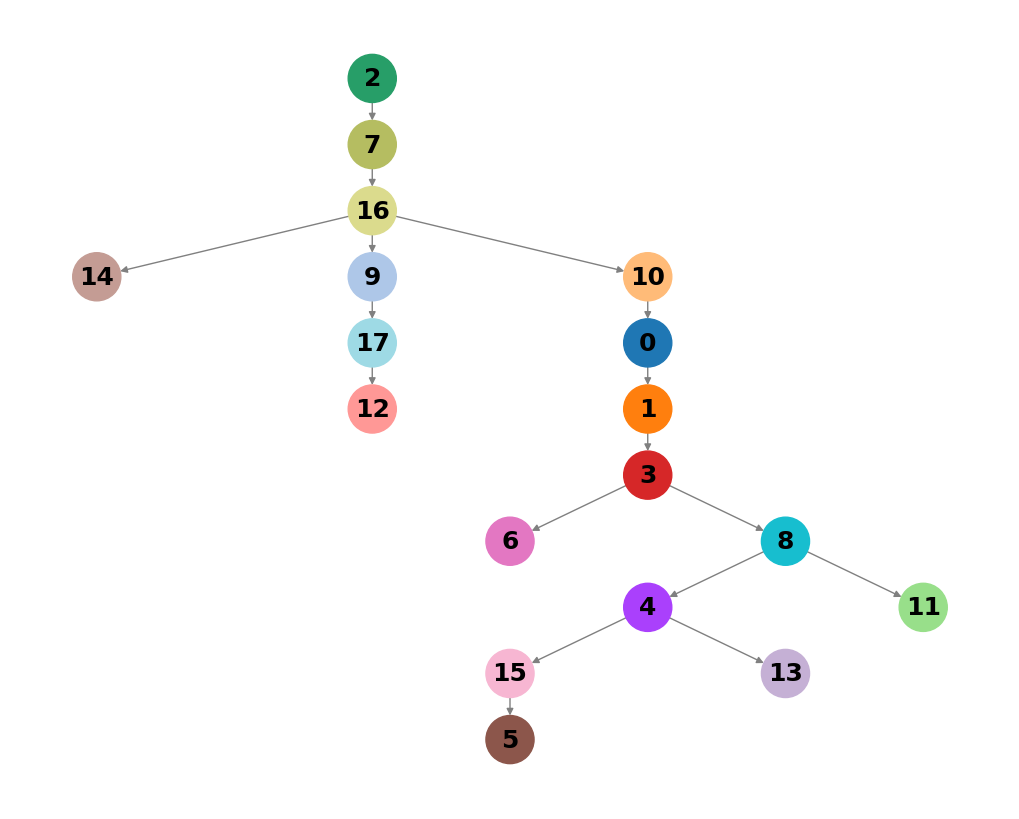

In [11]:
cp.pl.trajectory_tree(adata2)

In [13]:
cdata = cp.tl.tree_alignment(adata, adata2, num_genes1=2000, num_genes2=2000)

Calculating tree alignment
513 genes are used to calculate cost of tree alignment.

Calculation finished.


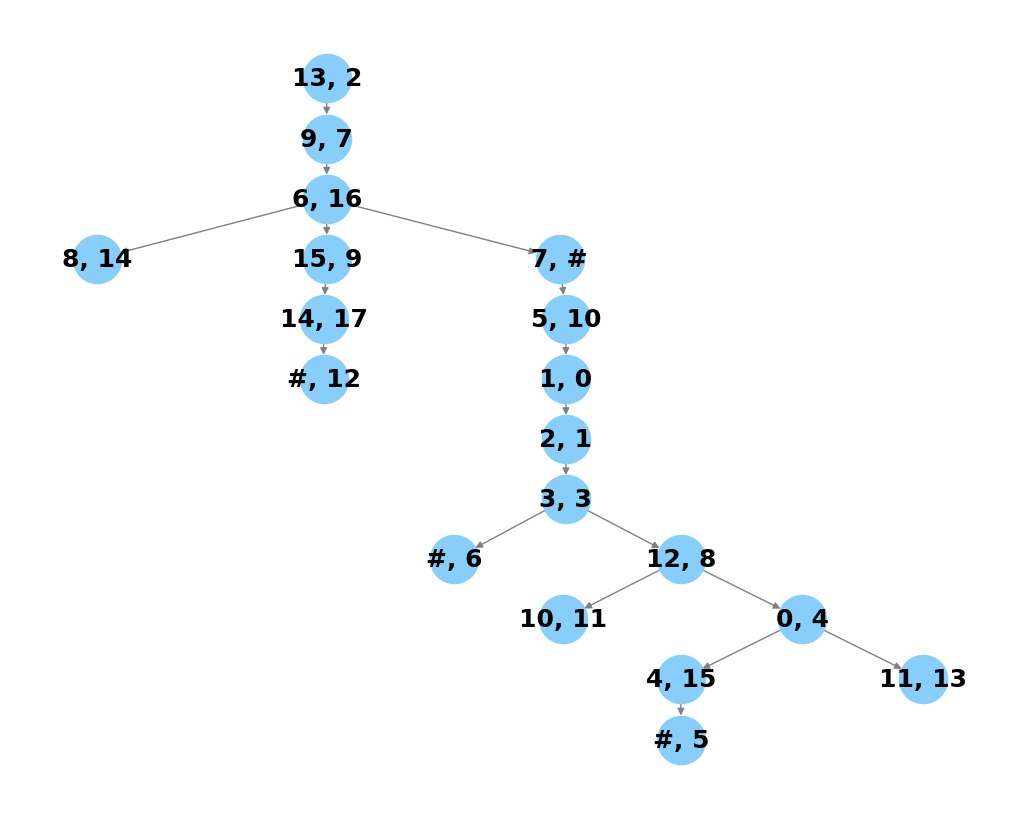

In [14]:
cp.pl.tree_alignment(cdata)

In [15]:
cdata.alignmentcost / (16+18)

array([0.4011626866])

In [16]:
cdata.alignmentcost

array([13.639531344])